# Introduction to Machine learning

When you have a brainstorming at the beginning of a project, when you try to answer the question whether a given technical or business problem is “machine-learnable” and, if yes, you should try to solve it with machine learning.
- 모든 문제 해결을 ML로 해결하려는 성급함과 미신을 버려라 !

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # 시각화 seaborn

### 컴퓨터가 보는 세상
### Images are numbers !
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdL71mg%2Fbtq7pds2Fq4%2FUazA8WFnyR8kK5gOnlQqh0%2Fimg.png' width=600 height=600>

# Recognizing hand-written digits

In [2]:
from sklearn import datasets
digits = datasets.load_digits() #data = digits.images.reshape((len(digits.images), -1))
data = pd.DataFrame(digits.data, columns=[digits.feature_names]).head()
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Text(0.5, 1.0, 'Training: 0')

Text(0.5, 1.0, 'Training: 1')

Text(0.5, 1.0, 'Training: 2')

Text(0.5, 1.0, 'Training: 3')

Text(0.5, 1.0, 'Training: 4')

Text(0.5, 1.0, 'Training: 5')

Text(0.5, 1.0, 'Training: 6')

Text(0.5, 1.0, 'Training: 7')

Text(0.5, 1.0, 'Training: 8')

Text(0.5, 1.0, 'Training: 9')

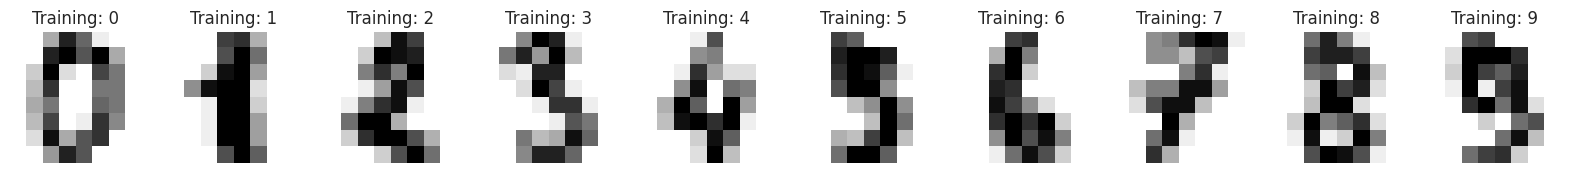

In [3]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Why the Model Works on New Data
- 확률적으로 과거의 데이터는 반복되며 예측 오류가 적을 확률이 작기 때문
- Data Drift가 존재하지 않는다는 가정

<img src='https://ml-explained.com/articles/logistic-regression-explained/logistic_regression_decision_boundary.png'>

If the examples used for training were selected randomly, independently of one another, and following the same procedure, then, statistically, it is **more likely** that the new negative example will be located on the plot somewhere not too far from other negative examples.
The same concerns the new positive example: it will likely come from the surroundings of other positive examples. In such a case, our <font color='red'> decision boundary </font> will still, **with high probability**, separate well new positive and negative examples from one another. For other, **less likely situations**, our model will make errors, but because such situations are less likely, the number of errors will likely be smaller than the number of correct predictions.

## cross validation

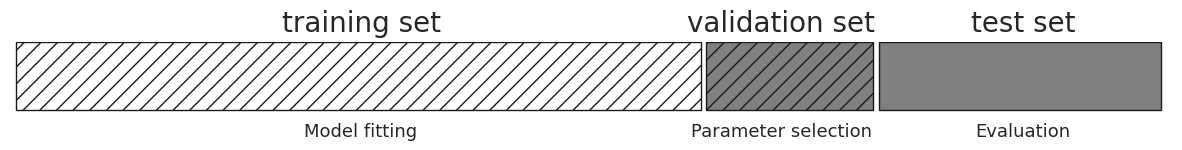

In [4]:
# https://github.com/amueller/mglearn, IBook 'ntroduction to Machine Learning with Python'
! pip install mglearn
import mglearn
mglearn.plot_cross_validation.plot_threefold_split()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, shuffle=False)

### SVM algorithm

In [6]:
from sklearn import svm
from sklearn.metrics import accuracy_score
clf = svm.SVC()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
accuracy_score(y_test, predicted)

SVC()

0.9610678531701891

In [ ]:
# prompt: confusion matrix를 시각화해줘 간단한 코드로

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, predicted)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set labels and title
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


<Axes: >

Text(0.5, 19.049999999999997, 'Predicted label')

Text(46.25, 0.5, 'True label')

Text(0.5, 1.0, 'Confusion Matrix')

### Perceptron algorithm

In [7]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=1).fit(X_train, y_train)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
accuracy_score(y_test, predicted)

Perceptron(random_state=1)

0.8954393770856507

### Logistic regression algorithm

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
accuracy_score(y_test, predicted)

LogisticRegression()

0.9299221357063404

# Supervised learning

<img src='https://miro.medium.com/max/1132/1*ZCHkLYpddF6N5UOAfd-HRg.png'>

In [9]:
# !pip install --upgrade scikit-learn

Text(0.5, 1.0, 'Input data')

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Nearest Neighbors')

Text(2.3813716830490255, -1.2357020680498332, '.97')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Decision Tree')

Text(2.3813716830490255, -1.2357020680498332, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=1,
                                        n_estimators=10, random_state=42))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Random Forest')

Text(2.3813716830490255, -1.2357020680498332, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Logistic Regression')

Text(2.3813716830490255, -1.2357020680498332, '.88')

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.93')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.78')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=1,
                                        n_estimators=10, random_state=42))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.75')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.40')

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=1,
                                        n_estimators=10, random_state=42))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

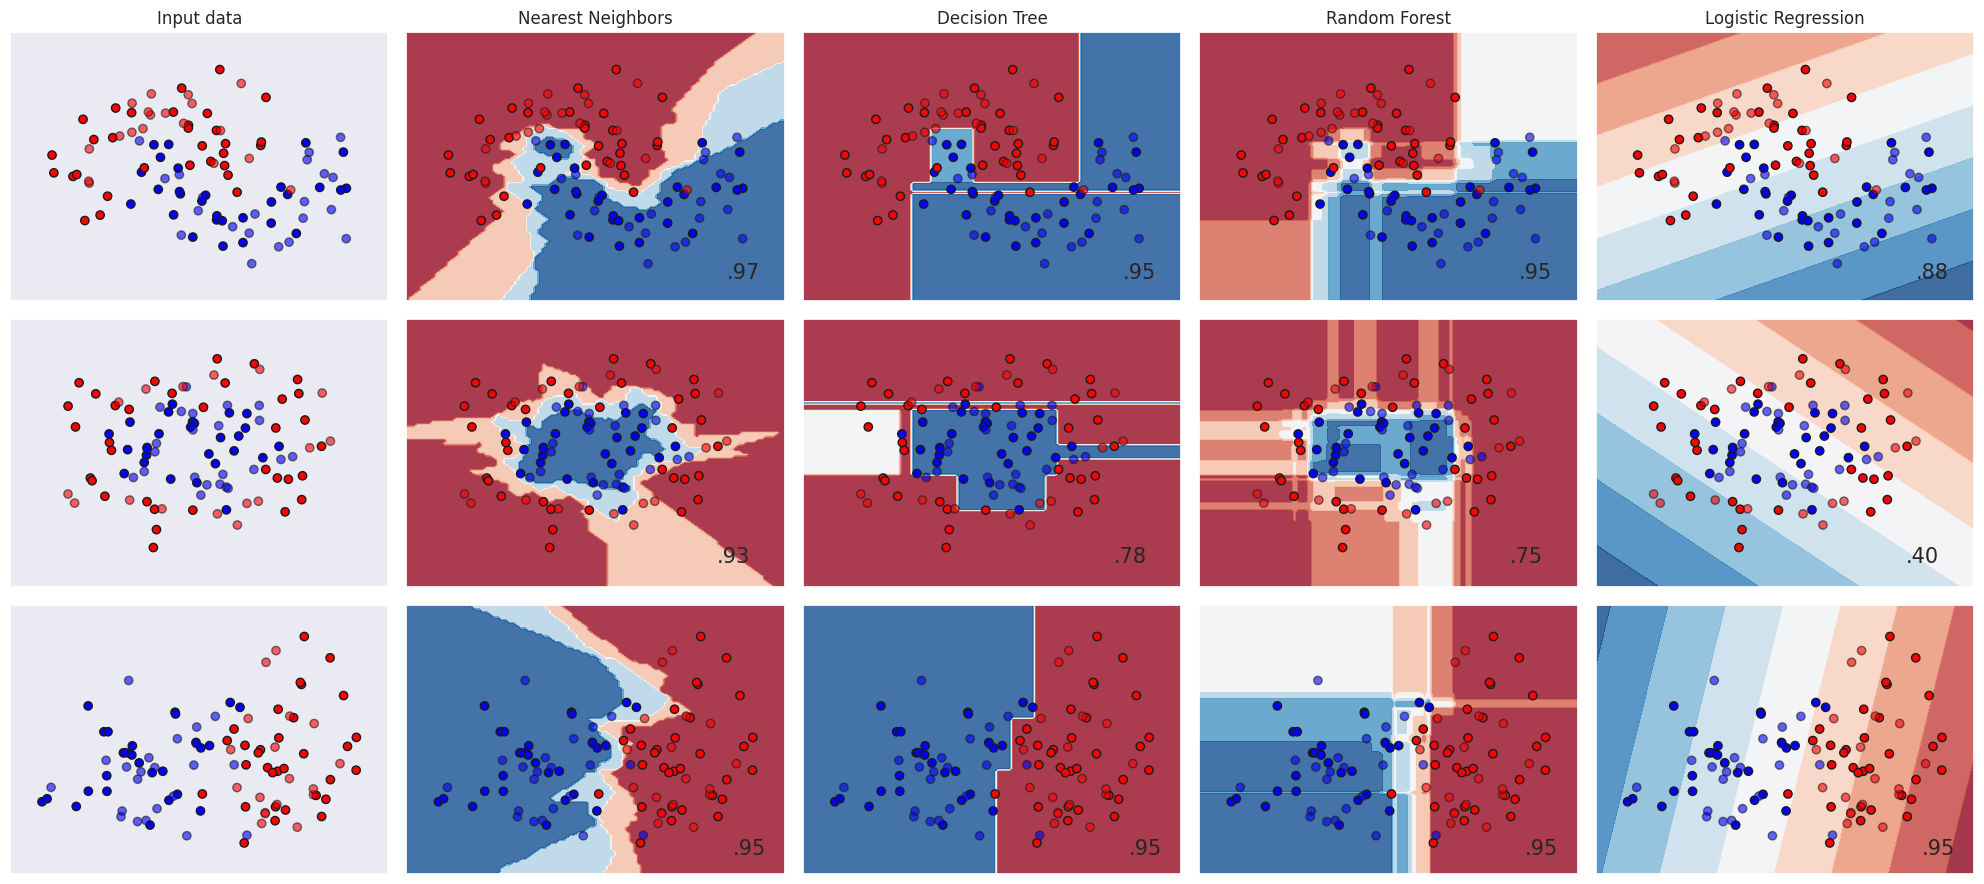

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Define the names and classifiers
names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Logistic Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    LogisticRegression(max_iter=1000, random_state=42),
]

# Generate datasets
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

# Set up the plot
figure = plt.figure(figsize=(20, 9))
i = 1

# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset, split into training and test parts
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Plot the dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")
        i += 1

plt.tight_layout()
plt.show()


# Data Representation

## Tabular data
<img src='http://jalammar.github.io/images/pandas-intro/0%20excel-to-pandas.png'>

## Audio and Timeseries data
<img src= 'http://jalammar.github.io/images/numpy/numpy-audio.png'>

## Audio and Timeseries data
<img src='http://jalammar.github.io/images/numpy/numpy-grayscale-image.png'>
<img src='http://jalammar.github.io/images/numpy/numpy-color-image.png'>

## Text data
<img src='http://jalammar.github.io/images/numpy/numpy-nlp-embeddings.png'>
<img src='http://jalammar.github.io/images/numpy/numpy-nlp-bert-shape.png'>

## Parameters vs. Hyperparameters

- A hyperparameter is a property of a learning algorithm, usually (but not always) having a numerical value. That value influences the way the algorithm works. Hyperparameters aren’t learned by the algorithm itself from data. They have to be set by the data analyst before running the algorithm.

- Parameters are variables that define the model learned by the learning algorithm. Parameters are directly modified by the learning algorithm based on the training data. The goal of learning is to find such values of parameters that make the model optimal in a certain sense.

## Model-Based vs. Instance-Based Learning
- Most supervised learning algorithms are model-based. Model-based learning algorithms use the training data to create a model that has parameters learned from the training data. After the model was built, the training data can be discarded.
- Instance-based learning algorithms use the whole dataset as the model. One instance-based algorithm frequently used in practice is k-Nearest Neighbors (kNN). In classification, to predict a label for an input example the kNN algorithm looks at the close neighborhood of the input example in the space of feature vectors and outputs the label that it saw the most often in this close neighborhood.

## Shallow vs. Deep Learning
- A shallow learning algorithm learns the parameters of the model directly from the features of the training examples. Most supervised learning algorithms are shallow.
- The notorious exceptions are neural network learning algorithms, specifically those that build neural networks with more than one layer between input and output. Such neural networks are called deep neural networks. In deep neural network learning (or, simply, deep learning), contrary to shallow learning, most model parameters are learned not directly from the features
of the training examples, but from the outputs of the preceding layers.

# End

# Multiclasss classification
## OvR stands for "One vs Rest"
<img src='https://miro.medium.com/max/1313/1*wY4puy2JRUMNu4akV1M9yQ.png'>